In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

from sklearn.decomposition import SparsePCA

In [48]:
m = 500
n = 500
r = 5
c = 2
alpha = 0.1
s = round(alpha*n*r) #round(alpha*n*r)
N = 500; # number of samples

alpha = s/(n*r)
print(s)
print(alpha)

250
0.1


In [49]:
struct_s = np.repeat(round(s/r), r)
subspace0, q0 = GenerateQSMat1((n,r), struct_s)

sparsities = np.count_nonzero(q0, 0)
# Signal strength
theta = np.linspace(5, 2, num = r) # np.zeros((r,)) #
theta = np.diag(theta)
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + 5*q0 @ q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

1.7888492375730287
0.019330244175433733


In [50]:
lam = n
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s)
problem.objective(q0)

500


506.39843504628027

In [51]:
HTr = FixedRank(r)
subspaces,_ = HTr.project(A._matrix)
HTso = SparseOblique(struct_s)
_, x0 = HTso.project_quasi(subspaces[1])

In [52]:
solver_lf = LandingField(logverbosity = 2, maxiter = 10000)
solver_ospca = ObliqueSPCA(logverbosity = 2, maxiter = 10000)

In [53]:
subspace, x, opt_log = solver_ospca.solve(problem=problem, lam=lam, x=x0)

 iter		   obj. value	    grad. norm
    1	+5.2002928687492886e+02	9.12370021e+01
    2	+5.1926409072899730e+02	7.00948313e+01
    3	+5.1907027639624562e+02	7.23656158e+01
    4	+5.1858212280293515e+02	6.29812229e+01
    5	+5.1836194338052053e+02	6.20250496e+01
    6	+5.1832633088278442e+02	5.63160677e+01
    7	+5.1814936812778171e+02	6.02653354e+01
    8	+5.1805865717699317e+02	5.54462797e+01
    9	+5.1801247788166791e+02	5.62200490e+01
   10	+5.1793862008008762e+02	5.52063331e+01
   11	+5.1791988196006253e+02	5.59223403e+01
   12	+5.1785599066854138e+02	5.51538142e+01
   13	+5.1782035304410476e+02	5.58144984e+01
   14	+5.1641958997129382e+02	5.51111428e+01
   15	+5.1346733833167661e+02	8.90438068e+01
   16	+5.1319373222473075e+02	6.11360873e+01
   17	+5.1285561387589246e+02	6.44240417e+01
   18	+5.1265660246606853e+02	6.11400989e+01
   19	+5.1252836397286103e+02	5.66727846e+01
   20	+5.1252220171543468e+02	5.68650660e+01
   21	+5.1198976993874908e+02	7.02661778e+01
   22	+5.1177163019

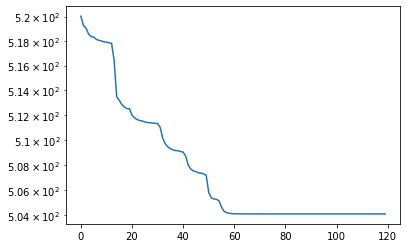

In [54]:
plt.semilogy(opt_log['iterations']['fx'])

In [55]:
alpha_scikit = 0.48
transformer = SparsePCA(n_components=r, random_state=0, alpha = alpha_scikit)
transformer.fit(A._matrix)
x_scikit = transformer.components_.T
print('alpha: ', alpha_scikit, '| sparsity ratio:', np.count_nonzero(x_scikit)/s)

alpha:  0.48 | sparsity ratio: 0.936


naive:        0.7888689580656786
scikit:       0.791459761346382
oblique:      0.7945215515418185
groundtruth:  0.7935503130271436
max non-orthogonality of x: 0.011087400231492833


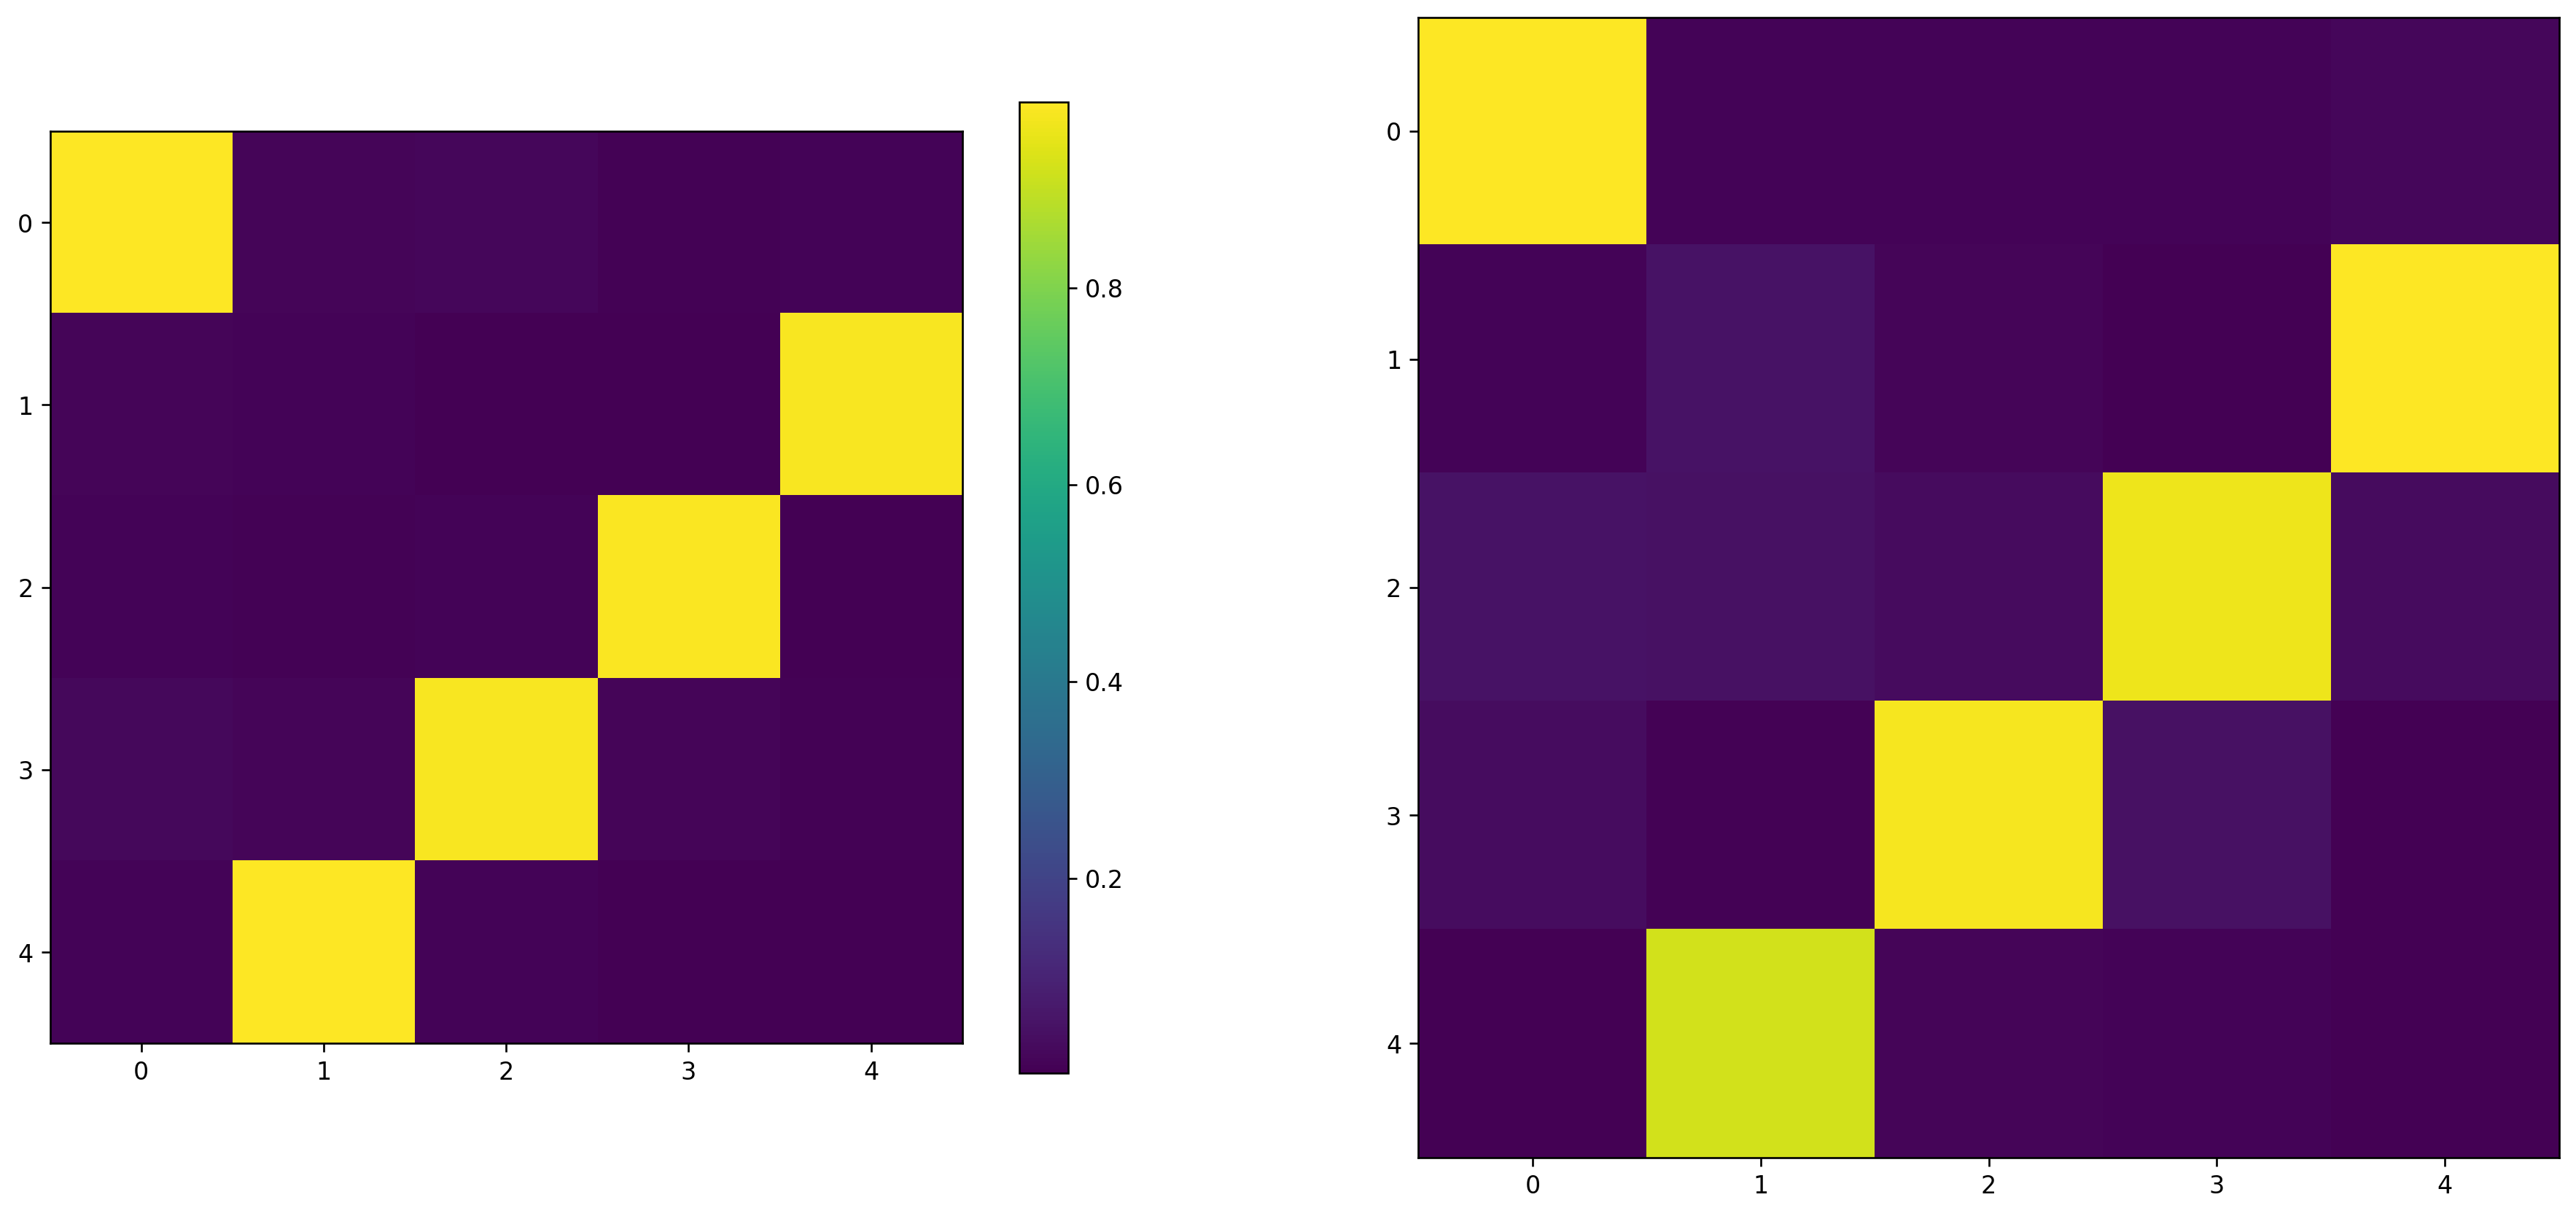

In [56]:
print('naive:       ', 1 - problem.objective(x0) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('scikit:      ', 1 - problem.objective(x_scikit) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('oblique:     ', 1 - problem.objective(x) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('groundtruth: ', 1 - problem.objective(q0) / (2*np.linalg.norm(A._matrix,'fro')**2))
if r == 1:
    print(np.linalg.norm( (q0.T @ x) * x - q0))
else:
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(240)
    im1=axs[0].imshow(np.abs(q0.T @ x))
    im2=axs[1].imshow(np.abs(x_scikit.T @ q0))
    fig.colorbar(im1, ax = axs[0], shrink=.7)
    print('max non-orthogonality of x:', np.max(np.abs(np.eye(r,r) - x.T @ x)))

In [35]:
print(q0)

[[-0.12321281  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.16055587  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.10793189  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.14099925]]


In [ ]:
s/r

10.0